In [1]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

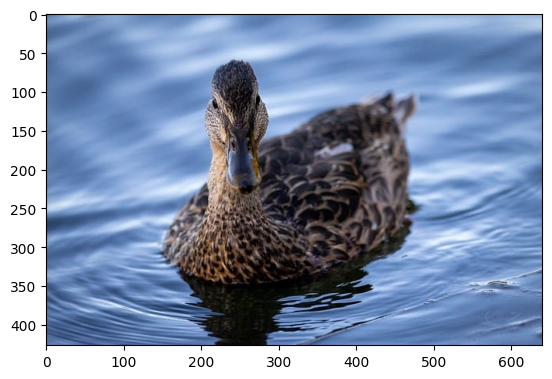

In [2]:
im = read_im(pathlib.Path("images", "duck.jpeg"))
plt.imshow(im)
plt.show()

In [3]:
def convolve_im(im, kernel):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3

    # Get dimensions of the image and kernel
    H,W,K = np.shape(im)          # image dimensions
    h,w = np.shape(kernel)      # kernel dimensions

    # Create reflected image
    
    # step 1 : padded image with zeros
    padded_image = np.zeros((H+2*(h//2), W+2*(w//2),K))
    padded_image[h//2:h//2+H,w//2:w//2+W,:] = im
    # step 2 make reflections
    padded_image[0:h//2,:] = padded_image[h//2:h-h//2,:][::-1]          #top
    padded_image[h//2+H:,:] = padded_image[H:H+h-2*(h//2),:][::-1]      #bottom
    padded_image[:,0:w//2,:] = padded_image[:,w//2:w-w//2,:][:,::-1]    #left
    padded_image[:,W+w//2:,:] = padded_image[:,W:W+w-2*(w//2),:][:,::-1]#right

    convoluted_image = np.zeros(np.shape(im))

    # perform convolution (flip the kernel in both directions)
    for channel in range(np.shape(im)[2]):
        for row in range (H):
            for column in range(W):
                convoluted_image[row,column,channel] = np.sum(np.multiply(kernel[::-1,::-1],
                                                            padded_image[row:row+h,column:column+w,channel]))

    # return image rescaled between 0 and 1
    return (convoluted_image-convoluted_image.min())/(convoluted_image.max()-convoluted_image.min())

In [4]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
#save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
#save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

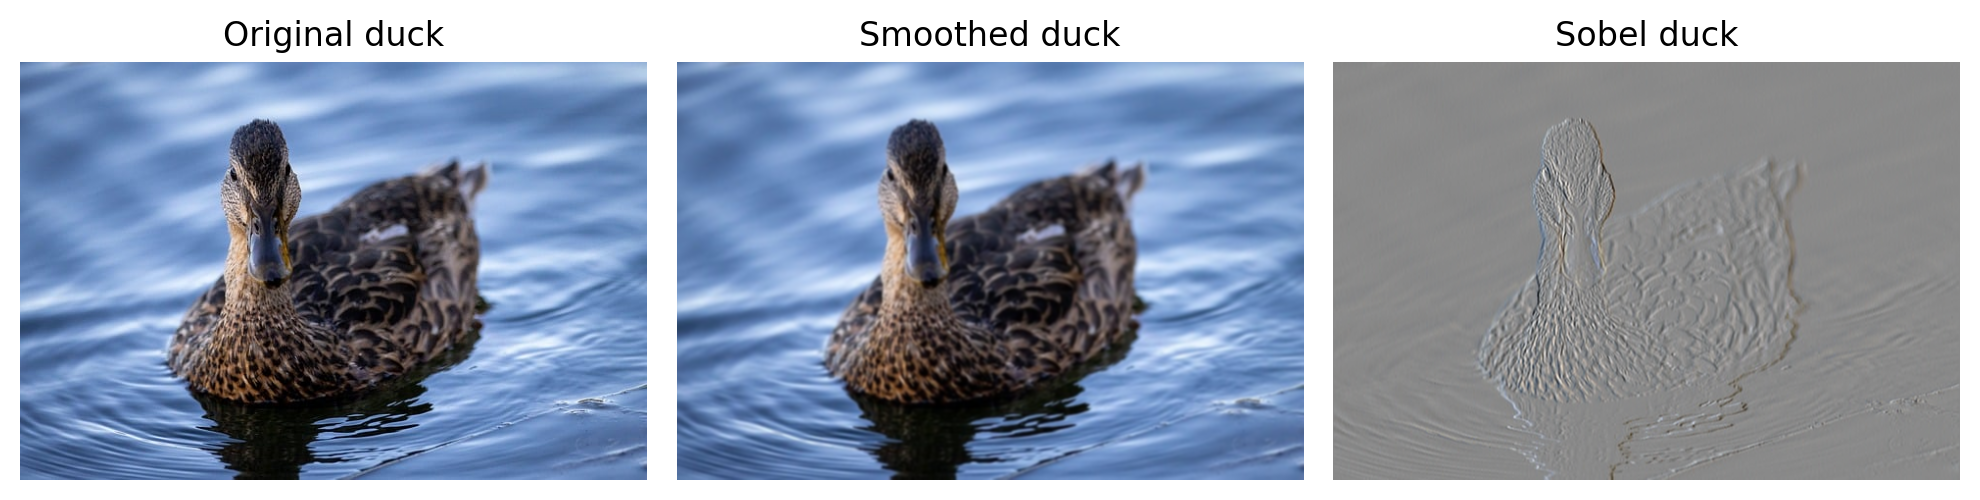

In [5]:
fig = plt.figure(figsize=(10,10),dpi=200)
plt.subplot(1,3,1)
plt.imshow(im)
plt.title("Original duck"); plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(normalize(im_smoothed))
plt.title("Smoothed duck"); plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(normalize(im_sobel))
plt.title("Sobel duck"); plt.axis('off')

fig.tight_layout()
plt.show()